In [5]:
#initialization
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('JunqiYang722').getOrCreate()
#Read csv file
df = spark.read.csv('AirQuality.csv',header=True,inferSchema=True)

Initial Exploration

In [3]:
df.show()

+--------------+-------+--------+---+----+----+---+----+----+----+-------+----+----+--------+---------+----+----+---+---+-----+----------+----------+-----+
|          time|station|AMB_TEMP|CH4|  CO|NMHC| NO| NO2| Nox|  O3|PH_RAIN|PM10|PM25|RAINFALL|RAIN_COND|  RH| SO2|THC|UVB|WD_HR|WIND_DIREC|WIND_SPEED|WS_HR|
+--------------+-------+--------+---+----+----+---+----+----+----+-------+----+----+--------+---------+----+----+---+---+-----+----------+----------+-----+
| 2015/1/1 0:00|Banqiao|    16.0|2.1|0.79|0.14|1.2|16.0|17.0|37.0|     NR| 177|78.0|      NR|       NR|57.0|12.0|2.2|0.0| 69.0|      69.0|       4.7|  4.2|
| 2015/1/1 1:00|Banqiao|    16.0|2.1| 0.8|0.15|1.3|16.0|17.0|36.0|     NR| 178|77.0|      NR|       NR|57.0|11.0|2.2|0.0| 67.0|      65.0|       4.0|  4.0|
| 2015/1/1 2:00|Banqiao|    16.0|2.1|0.71|0.13|1.0|13.0|14.0|38.0|     NR| 163|72.0|      NR|       NR|57.0| 8.0|2.2|0.0| 63.0|      53.0|       3.7|  3.5|
| 2015/1/1 3:00|Banqiao|    15.0|2.0|0.66|0.12|0.8|11.0|12.0|39.

In [4]:
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- station: string (nullable = true)
 |-- AMB_TEMP: double (nullable = true)
 |-- CH4: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- NMHC: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- Nox: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- PH_RAIN: string (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM25: double (nullable = true)
 |-- RAINFALL: string (nullable = true)
 |-- RAIN_COND: string (nullable = true)
 |-- RH: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- THC: double (nullable = true)
 |-- UVB: double (nullable = true)
 |-- WD_HR: double (nullable = true)
 |-- WIND_DIREC: double (nullable = true)
 |-- WIND_SPEED: double (nullable = true)
 |-- WS_HR: double (nullable = true)



In [14]:
df.select('SO2', 'AMB_TEMP', 'PM10').describe().show()

+-------+------------------+------------------+------------------+
|summary|               SO2|          AMB_TEMP|              PM10|
+-------+------------------+------------------+------------------+
|  count|            214531|            197748|            213374|
|   mean|3.4552978357440183|23.312762505815478|45.496306953986895|
| stddev| 5.796185576838794|5.8679476400683255|163.48165810591306|
|    min|               0.0|             -30.0|               -64|
|    max|             368.0|              59.0|              9999|
+-------+------------------+------------------+------------------+



In [3]:
df.describe().show()

+-------+-------------+-------+------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+
|summary|         time|station|          AMB_TEMP|                CH4|                CO|               NMHC|               NO|               NO2|               Nox|                O3|          PH_RAIN|              PM10|              PM25|          RAINFALL|         RAIN_COND|                RH|               SO2|               THC|               UVB|             WD_HR|       WIND_DIREC|       WIND_SPEED|             WS_HR|
+-------+-------------+-------+------------------+-------------------+------------------+-------------------+-----------------+---------------

In [6]:
print("Total data points:", df.count())

Total data points: 216107


In [6]:
pddf=pd.read_csv('AirQuality.csv')
#spark_df = spark.createDataFrame(pddf)
#spark_df.show()
pddf.describe()

/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AMB_TEMP,CH4,CO,NMHC,NO,NO2,Nox,O3,PM10,PM25,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
count,197748.000000,94859.000000,214786.000000,94730.000000,214700.000000,214572.000000,214701.000000,197455.000000,213374.000000,213287.000000,197821.000000,214531.000000,94860.000000,25663.000000,180558.000000,180295.000000,180323.000000,180129.000000
mean,23.312763,1.934970,0.564810,0.268497,9.078314,17.947903,26.997344,29.051351,45.496307,19.514416,75.807026,3.455298,2.202982,1.318727,145.211673,145.395811,2.412508,1.987055
std,5.867948,0.211716,0.546141,0.239970,17.802593,12.089868,26.738421,17.876994,163.481658,60.047224,13.759191,5.796186,0.387316,2.324758,86.683976,87.741550,1.673208,1.652058
min,-30.000000,0.000000,0.000000,-8.240000,0.000000,0.000000,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.800000,0.270000,0.110000,1.400000,8.600000,10.000000,15.000000,26.000000,9.000000,67.000000,1.700000,2.000000,0.000000,76.000000,75.000000,1.200000,0.800000
50%,24.000000,1.900000,0.420000,0.190000,2.700000,15.000000,19.000000,28.000000,37.000000,16.000000,77.000000,2.600000,2.100000,0.000000,112.000000,112.000000,2.000000,1.500000
75%,28.000000,2.000000,0.660000,0.350000,7.500000,25.000000,33.000000,41.000000,52.000000,25.000000,86.000000,4.000000,2.400000,1.600000,220.000000,221.000000,3.100000,2.700000
max,59.000000,15.000000,38.000000,6.860000,358.000000,166.000000,411.000000,200.000000,9999.000000,10199.000000,100.000000,368.000000,20.000000,13.000000,360.000000,360.000000,29.000000,28.000000


In [4]:
pddf['SO2'].describe()

count    214531.000000
mean          3.455298
std           5.796186
min           0.000000
25%           1.700000
50%           2.600000
75%           4.000000
max         368.000000
Name: SO2, dtype: float64

In [7]:
#Drop some attributes - they have too many null values
pddf.drop(['CH4','NMHC','THC','UVB','RAINFALL','RAIN_COND','PH_RAIN','station','time','PM10'],axis=1,inplace=True)

In [8]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216107 entries, 0 to 216106
Data columns (total 13 columns):
AMB_TEMP      197748 non-null float64
CO            214786 non-null float64
NO            214700 non-null float64
NO2           214572 non-null float64
Nox           214701 non-null float64
O3            197455 non-null float64
PM25          213287 non-null float64
RH            197821 non-null float64
SO2           214531 non-null float64
WD_HR         180558 non-null float64
WIND_DIREC    180295 non-null float64
WIND_SPEED    180323 non-null float64
WS_HR         180129 non-null float64
dtypes: float64(13)
memory usage: 21.4 MB


In [4]:
'''
from pyspark.sql import SQLContext
from pyspark import SparkContext
sqlContest = SQLContext(spark)
spark_df = sqlContest.createDataFrame(pddf)
'''

In [10]:
pddf.dropna(axis=0,how='any',inplace=True)

In [ ]:
#Deal with the extreme values (Using Pandas)
pddf.replace(pddf.max(),pddf.median(),inplace=True)
pddf.replace(pddf.min(),pddf.median(),inplace=True)
#Deal with the values < 0 with the median values
pddf[pddf<0]=0
pddf.replace(0,pddf.median(),inplace=True)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

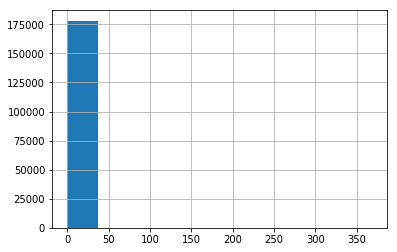

In [13]:
pddf['SO2'].hist(bins=10)

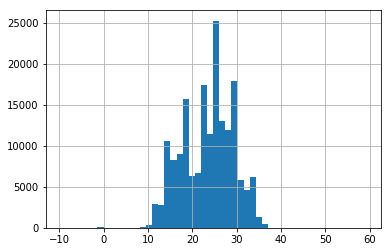

In [16]:
pddf['AMB_TEMP'].hist(bins=50)

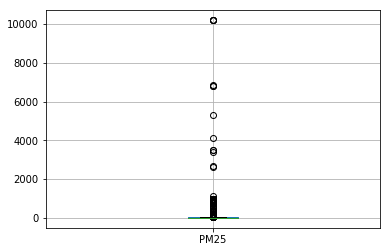

In [18]:
pddf.boxplot(column='PM25')

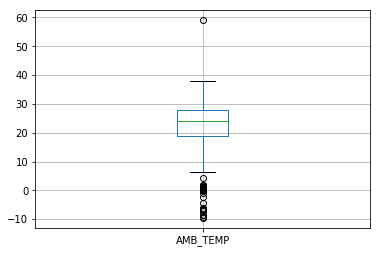

In [19]:
pddf.boxplot(column='AMB_TEMP')

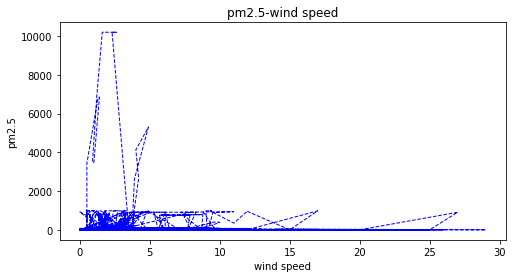

In [20]:
x=pddf['WIND_SPEED']
y=pddf['PM25']
plt.figure(figsize=(8,4))
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel('wind speed')
plt.ylabel('pm2.5')
plt.title('pm2.5-wind speed')
plt.show()

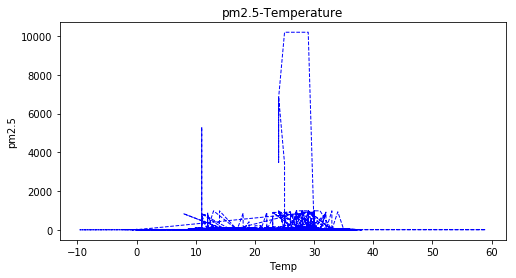

In [21]:
x=pddf['AMB_TEMP']
y=pddf['PM25']
plt.figure(figsize=(8,4))
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel('Temp')
plt.ylabel('pm2.5')
plt.title('pm2.5-Temperature')
plt.show()